In [2]:
import polars as pl
import pandas as pd
import numpy as np

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pl.read_parquet('../notebooks/data/bike_sales.parquet')

In [4]:
df.head(3)

date,customer age,customer gender,country,sub category,order quantity,unit cost,unit price,cost,revenue
date,i64,str,str,str,i64,i64,i64,i64,i64
2013-01-28,31,"""M""","""Australia""","""Mountain Bikes…",1,1912,3400,1912,2856
2015-01-28,31,"""M""","""Australia""","""Mountain Bikes…",1,1912,3400,1912,2856
2013-07-22,31,"""M""","""Australia""","""Mountain Bikes…",1,1912,3400,1912,2856


In [5]:
ctx = pl.SQLContext()
ctx.register('df', df)

<SQLContext [tables:1] at 0x7f3bd1287610>

In [7]:
ctx.execute('SELECT count(*) from df').collect()

count
u32
25982


In [18]:
ctx.execute("""
select "sub category", count(*) as total
from df 
group by "sub category"
order by total desc
"""
).collect()

sub category,total
str,u32
"""Road Bikes""",13430
"""Mountain Bikes…",8854
"""Touring Bikes""",3698


In [14]:
(
    df
    .group_by('sub category')
    .agg(pl.count())
    .sort('count', descending=True)
)

sub category,count
str,u32
"""Road Bikes""",13430
"""Mountain Bikes…",8854
"""Touring Bikes""",3698


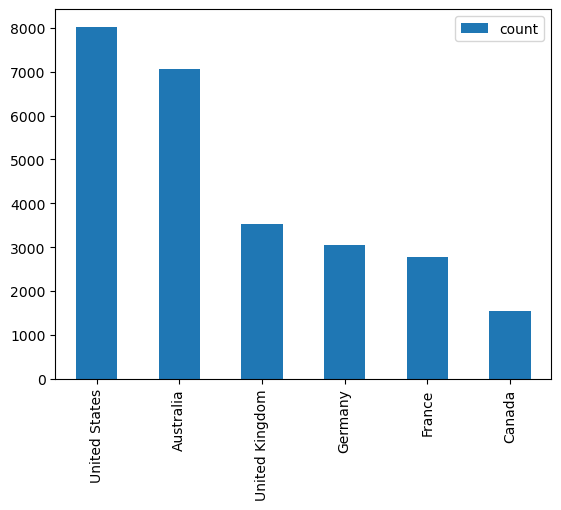

In [36]:
(
    df.
    group_by('country').
    agg(pl.count()).
    sort('count', descending=True).
    to_pandas().
    set_index('country').
    plot(kind='bar',xlabel='')
);

In [32]:
df.group_by('country').agg(pl.count())

country,count
str,u32
"""Germany""",3048
"""United States""",8028
"""Canada""",1548
"""Australia""",7064
"""France""",2770
"""United Kingdom…",3524


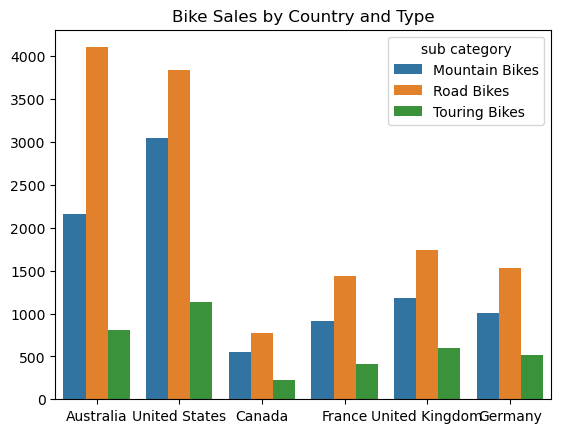

In [48]:
ax = sns.countplot(data=df, x='country',hue='sub category')
ax.set(xlabel='', ylabel='', title='Bike Sales by Country and Type')
plt.show();

In [51]:
ctx.execute("""
select count(*) from df
""")

<LazyFrame [1 col, {"count": UInt32}] at 0x7F3B9E6107F0>